# Template para pré-processamento

## Importanto bibliotecas necessárias

In [61]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [62]:
# deixar a pasta scripts vizivel no notebook
%load_ext autoreload
%autoreload 2

import sys
import os

module_path = os.path.abspath(os.path.join('..', 'pyscripts'))
if module_path not in sys.path :
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
# import module from scripts folder
import process_data

## Pré-processamento dos dados

In [64]:
## import dataset from ../data
simulations_folder = os.path.join('..','Simulations')

# the same file will be searching
main_file = 'total_packets.txt' 

simulations = ["PA", "PB", "CL2", "CL4", "CLBinomial"]

df_data = pd.DataFrame()

for folder in simulations:
    data_file = os.path.join(simulations_folder,folder,main_file)
    df = process_data.parser_main_table(data_file)
    df['Simulation'] = folder
    df_data = df_data.append(df,ignore_index=True)

del df

In [65]:
df = df_data[df_data['info_2'] != 'node=0']
df_data = df.copy()

In [66]:
df_data.head()

,info_0,info_1,info_2,"Counter, countACK","Counter, packetCount","Counter, recorded taxaMAC","Total, total ACKS","Total, total Packets",Simulation
1,setRateHigh,InterfModel=0,node=1,2.939,3.03,595.606,2796.909,2978.03,PA
2,setRateHigh,InterfModel=0,node=2,2.848,2.939,586.545,2838.697,2932.727,PA
3,setRateHigh,InterfModel=0,node=3,2.515,2.879,911.545,4212.03,4557.727,PA
4,setRateHigh,InterfModel=0,node=4,2.576,2.818,1311.667,6272.273,6558.333,PA
5,setRateHigh,InterfModel=0,node=5,2.636,3.242,1318.394,6086.697,6591.97,PA


In [67]:
df_data.columns

Index(['info_0', 'info_1', 'info_2', 'Counter, countACK',
       'Counter, packetCount', 'Counter, recorded taxaMAC',
       'Total, total ACKS', 'Total, total Packets', 'Simulation'],
      dtype='object')

### Certificar que os tipos de dados são apropriados

In [68]:
numeric_columns = [
        'Counter, countACK',
        'Counter, packetCount', 
        'Counter, recorded taxaMAC',
        'Total, total ACKS',
        'Total, total Packets'
]

df_data[numeric_columns] = df_data[numeric_columns].astype('float') * 100


In [69]:
taxa_dados = {
    'setRateLow' : 'baixa',
    'setRateMedium': 'média',
    'setRateHigh' : 'alta'
}

packet_rate = {
    'setRateLow' : 'low',
    'setRateMedium': 'medium',
    'setRateHigh' : 'high'
}

def infer_packet_rate(value,mapper=taxa_dados):
    return mapper.get(value,value)

df_data['info_0'] = df_data['info_0'].apply(infer_packet_rate)

In [70]:
modelo_colisao = {
    'InterfModel=0': 'sem colisão',
    'InterfModel=2': 'com colisão'
}

collision_model = {
    'InterfModel=0': 'without collision',
    'InterfModel=2': 'with collision'
}

def infer_collision_model(value,mapper=modelo_colisao):
    return mapper.get(value,value)

df_data['info_1'] = df_data['info_1'].apply(infer_collision_model)

In [71]:
nodes_PT = { 
        'node=1': 'E-Punho',
        'node=2': 'D-Punho',
        'node=3': 'E-Tornozelo',
        'node=4': 'D-Tornozelo',
        'node=5': 'Peito',
        'node=0' : 'Cintura'
    }

nodes_ENG = { 
        'node=1': 'L-wrist',
        'node=2': 'R-wrist',
        'node=3': 'L-ankle',
        'node=4': 'R-ankle',
        'node=5': 'chest',
    }

def infer_node(value,mapper=nodes_PT):
    return mapper[value]

df_data['info_2'] = df_data['info_2'].apply(infer_node)

In [72]:
column_portuguese = {
    'info_0' : 'Taxa de dados',
    'info_1' : 'Modelo de colisão',
    'info_2' : 'Nó sensor',
    'Counter, countACK' : 'Contador ACK',
    'Counter, packetCount' : 'Contador Pacotes',
    'Counter, recorded taxaMAC' : 'Registros de TaxaMAC',
    'Total, total ACKS' : 'Total de ACKs',
    'Total, total Packets' : 'Total de pacotes',
    'Simulation' : 'Simulação'
}

column_english = {
    'info_0' : 'Taxa de dados',
    'info_1' : 'Modelo de colisão',
    'info_2' : 'Nó sensor',
}

df_data.rename(mapper=column_portuguese,axis='columns', inplace=True)

In [73]:
df_data.columns

Index(['Taxa de dados', 'Modelo de colisão', 'Nó sensor', 'Contador ACK',
       'Contador Pacotes', 'Registros de TaxaMAC', 'Total de ACKs',
       'Total de pacotes', 'Simulação'],
      dtype='object')

In [74]:
df_data = df_data.drop(columns=[
    'Registros de TaxaMAC',
    'Contador ACK',
    'Contador Pacotes'
])

In [75]:
df_data.sample(5)

,Taxa de dados,Modelo de colisão,Nó sensor,Total de ACKs,Total de pacotes,Simulação
155,alta,com colisão,Peito,533733.3,665484.8,CLBinomial
161,baixa,sem colisão,Peito,114839.4,127818.2,CLBinomial
178,média,com colisão,D-Tornozelo,57230.3,64787.9,CLBinomial
83,alta,com colisão,Peito,536363.6,663712.1,CL2
134,média,sem colisão,D-Punho,59118.2,61106.1,CL4


In [76]:
df_stats = df_data.describe()
df_stats

,Total de ACKs,Total de pacotes
count,150.000000,150.000000
mean,210240.464667,255142.122000
std,182485.156376,220023.245882
min,38560.600000,60181.800000
25%,58503.025000,64742.450000
50%,136054.550000,161916.650000
75%,292429.550000,466337.150000
max,627227.300000,740666.700000


In [77]:
value_vars = df_stats.columns
value_vars = list(value_vars)
id_vars = set(df_data.columns) - set(df_stats)
id_vars = list(id_vars)

In [78]:
melted_data = df_data.melt(id_vars=id_vars,
                     value_vars=value_vars,
                     value_name='Pacotes',
                     var_name='MAC breakdown'
                    )

In [79]:
melted_data.head()

,Nó sensor,Simulação,Taxa de dados,Modelo de colisão,MAC breakdown,Pacotes
0,E-Punho,PA,alta,sem colisão,Total de ACKs,279690.9
1,D-Punho,PA,alta,sem colisão,Total de ACKs,283869.7
2,E-Tornozelo,PA,alta,sem colisão,Total de ACKs,421203.0
3,D-Tornozelo,PA,alta,sem colisão,Total de ACKs,627227.3
4,Peito,PA,alta,sem colisão,Total de ACKs,608669.7


## Visualization 

In [91]:
# df = melted_data[melted_data["Taxa de dados"] == "média"]

# opt_chart.update({"data" : df})

# grid = sns.catplot(data=df,
#                 x="Nó sensor",
#                 y="Pacotes",
#                 row="Modelo de colisão",
#                 hue="MAC breakdown",
#                 col="Simulação",
#                 kind="bar",
#                 height=2,
#                 aspect=3,
#                 sharex=False,
#                 sharey=False,)

# grid.set_titles(template='{col_name} - Cenário {row_name}')
# grid.set(ylabel="Pacotes",xlabel=None)

Text(0.5, 1, 'Comparação entre pacotes enviados e ACKs recebidos')

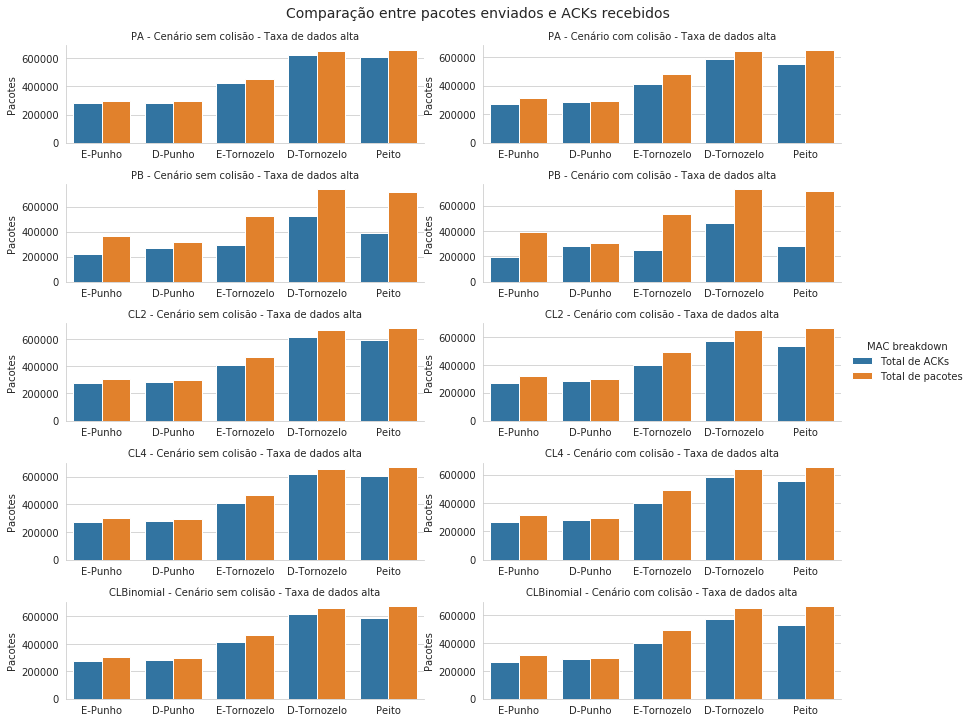

In [93]:
df = melted_data[melted_data["Taxa de dados"] == "alta"]

opt_chart.update({"data" : df})

grid = sns.catplot(data=df,
                x="Nó sensor",
                y="Pacotes",
                col="Modelo de colisão",
                hue="MAC breakdown",
                row="Simulação",
                kind="bar",
                height=2,
                aspect=3,
                sharex=False,
                sharey=False,)

grid.set_titles(template='{row_name} - Cenário {col_name} - Taxa de dados alta')
grid.set(ylabel="Pacotes",xlabel=None)

grid.fig.text(x=0.5,y=1,s="Comparação entre pacotes enviados e ACKs recebidos",fontsize=14, ha='center', va='bottom')

Text(0.5, 1, 'Comparação entre pacotes enviados e ACKs recebidos')

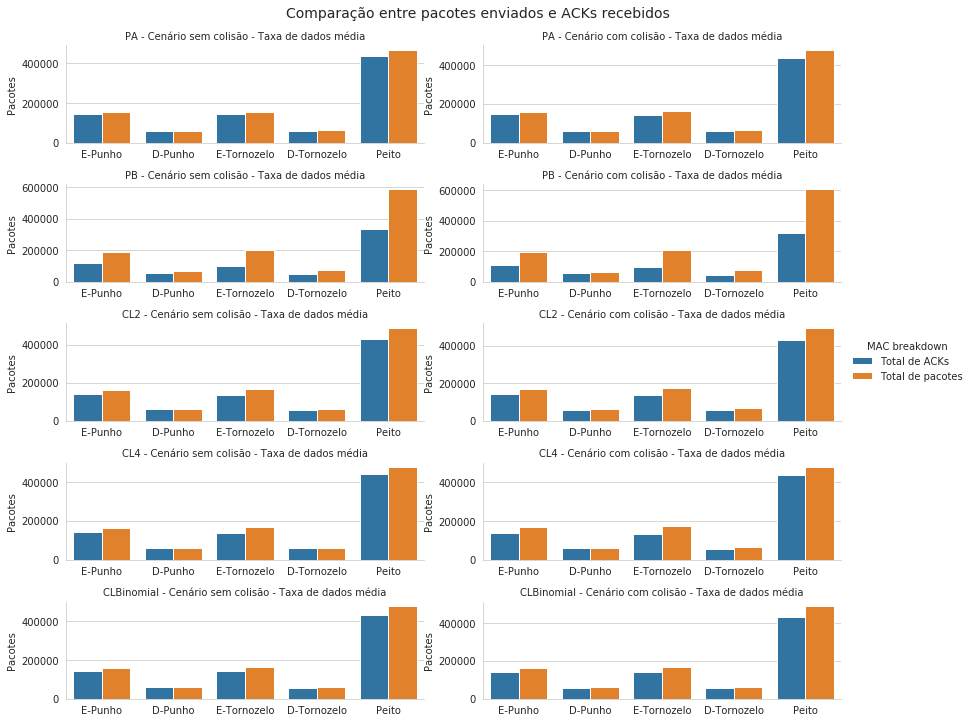

In [95]:
df = melted_data[melted_data["Taxa de dados"] == "média"]

opt_chart.update({"data" : df})

grid = sns.catplot(data=df,
                x="Nó sensor",
                y="Pacotes",
                col="Modelo de colisão",
                hue="MAC breakdown",
                row="Simulação",
                kind="bar",
                height=2,
                aspect=3,
                sharex=False,
                sharey=False,)

grid.set_titles(template='{row_name} - Cenário {col_name} - Taxa de dados média')
grid.set(ylabel="Pacotes",xlabel=None)

grid.fig.text(x=0.5,y=1,s="Comparação entre pacotes enviados e ACKs recebidos",fontsize=14, ha='center', va='bottom')

Text(0.5, 1, 'Comparação entre pacotes enviados e ACKs recebidos')

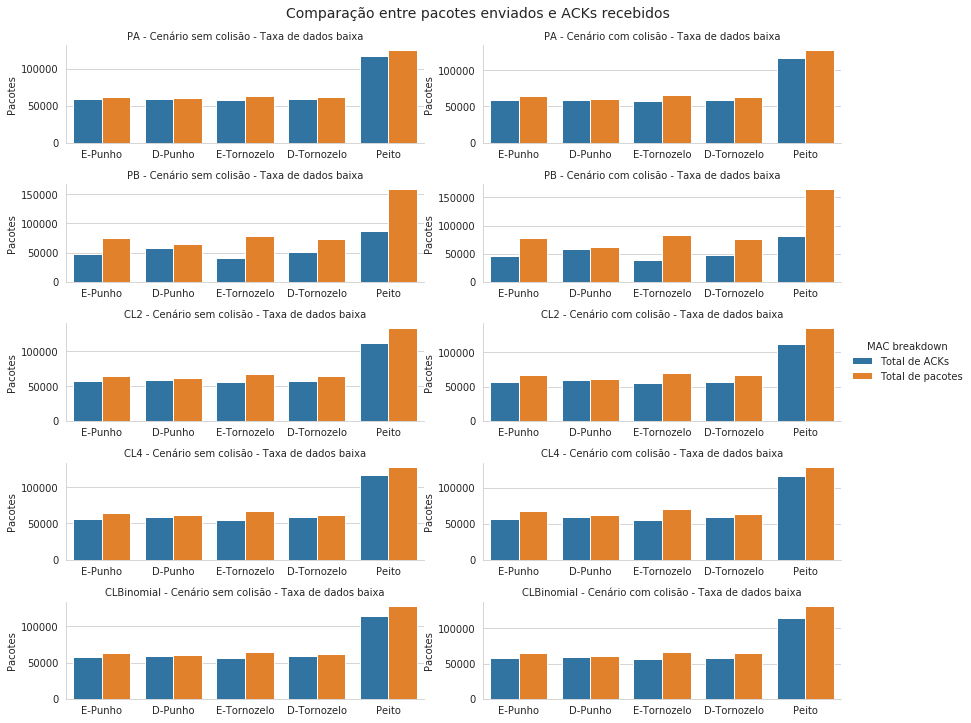

In [96]:
df = melted_data[melted_data["Taxa de dados"] == "baixa"]

opt_chart.update({"data" : df})

grid = sns.catplot(data=df,
                x="Nó sensor",
                y="Pacotes",
                col="Modelo de colisão",
                hue="MAC breakdown",
                row="Simulação",
                kind="bar",
                height=2,
                aspect=3,
                sharex=False,
                sharey=False,)

grid.set_titles(template='{row_name} - Cenário {col_name} - Taxa de dados baixa')
grid.set(ylabel="Pacotes",xlabel=None)

grid.fig.text(x=0.5,y=1,s="Comparação entre pacotes enviados e ACKs recebidos",fontsize=14, ha='center', va='bottom')

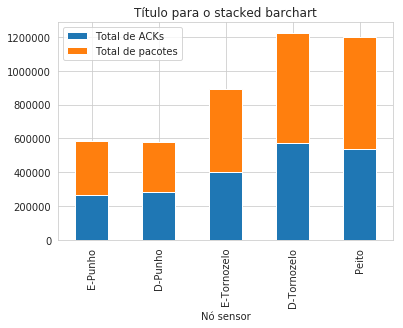

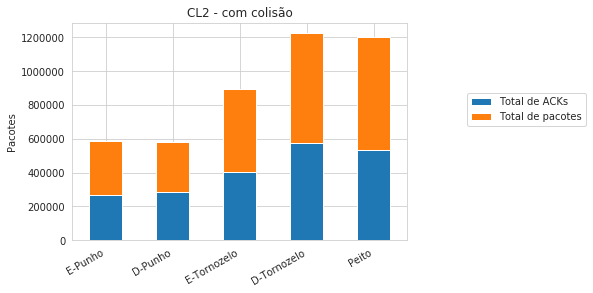

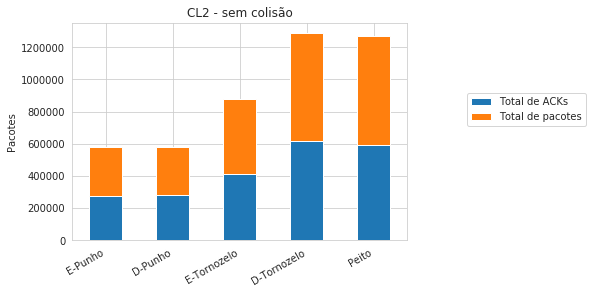

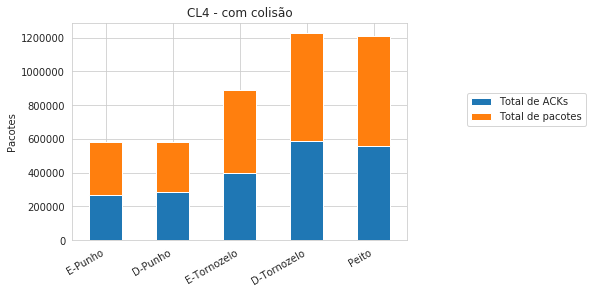

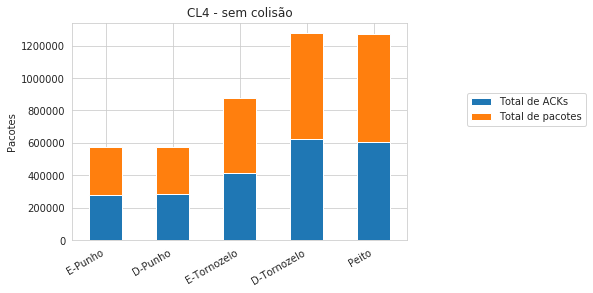

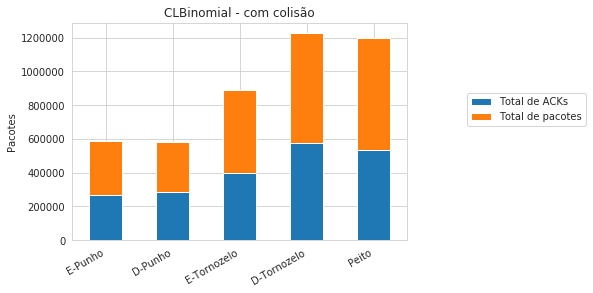

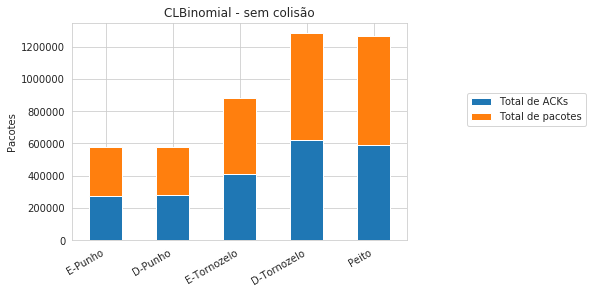

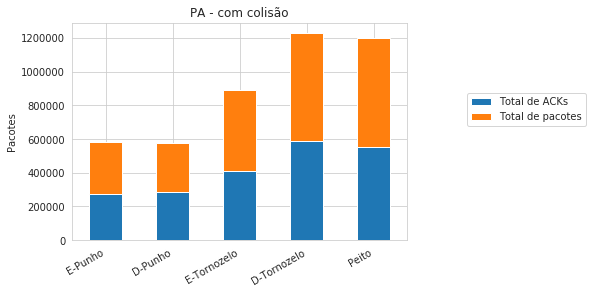

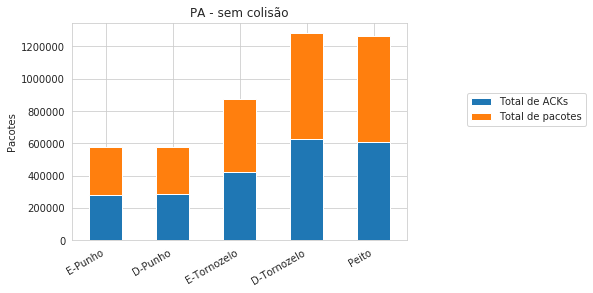

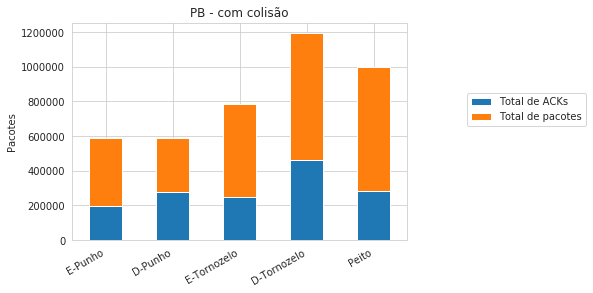

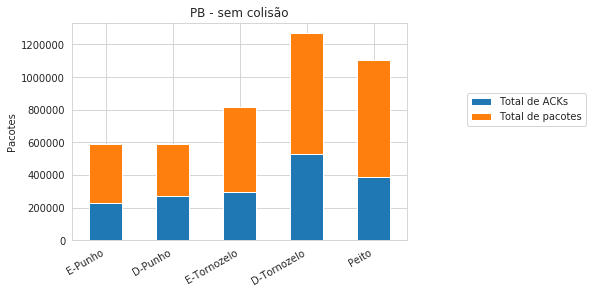

In [86]:
select = (df_data['Taxa de dados'] == 'alta') & (df_data['Nó sensor'] != 'Cintura')
df = df_data[select]

df = df.groupby(by=['Simulação','Modelo de colisão'])
axes = df.plot.bar(x='Nó sensor',stacked=True,title='Título para o stacked barchart')

for t, ax in zip(df.groups.keys(),axes) :
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Pacotes',xlabel=None)
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

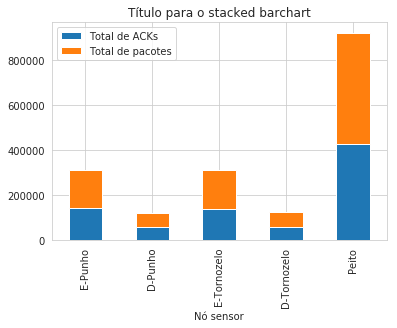

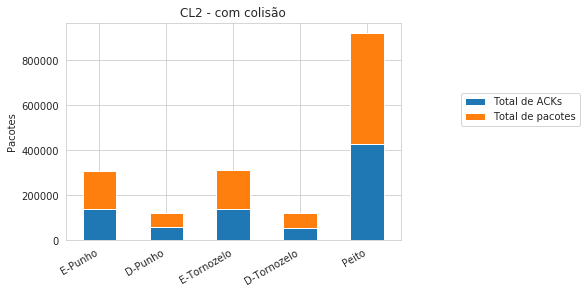

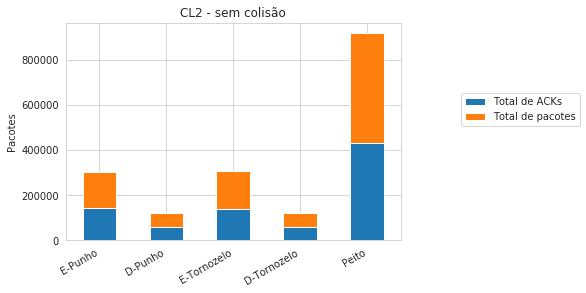

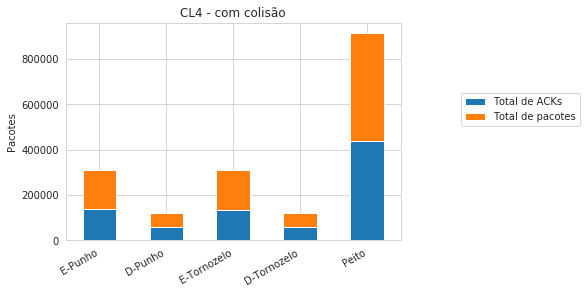

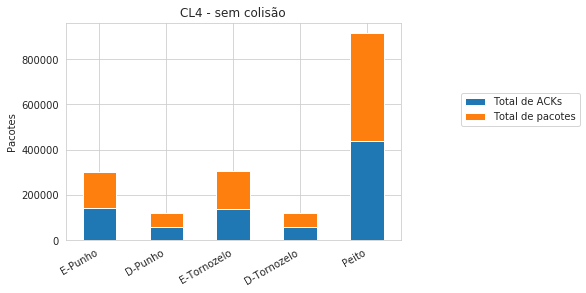

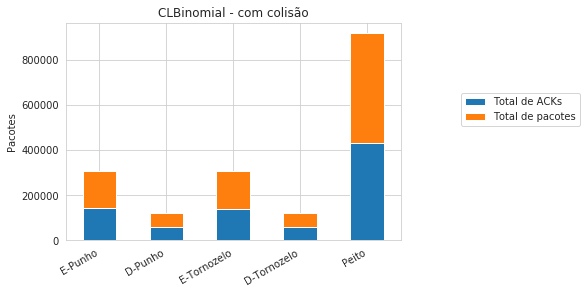

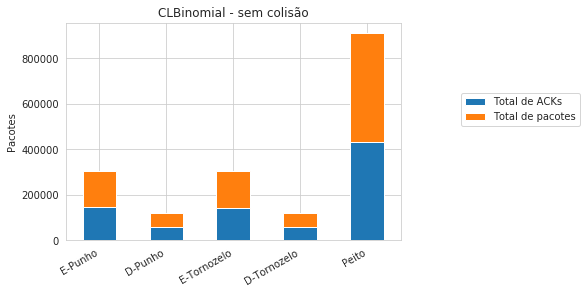

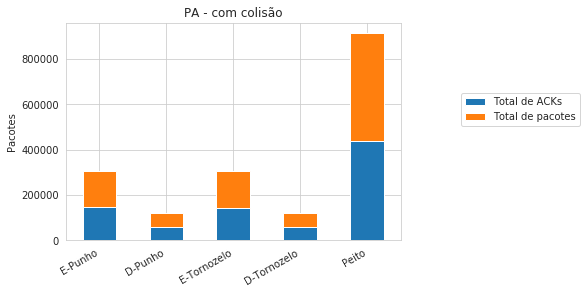

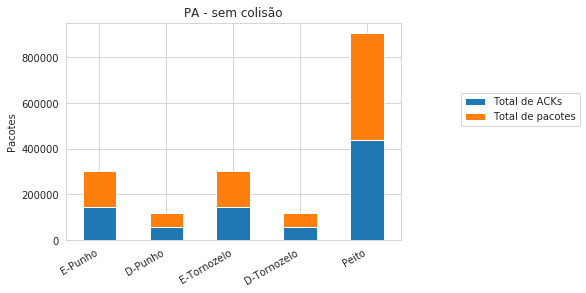

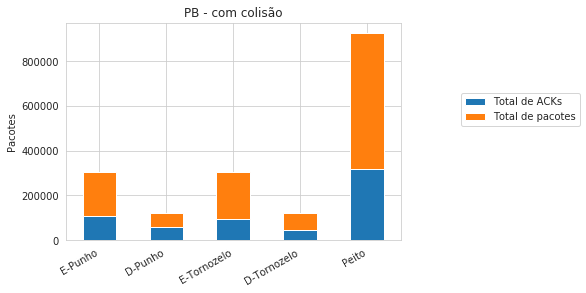

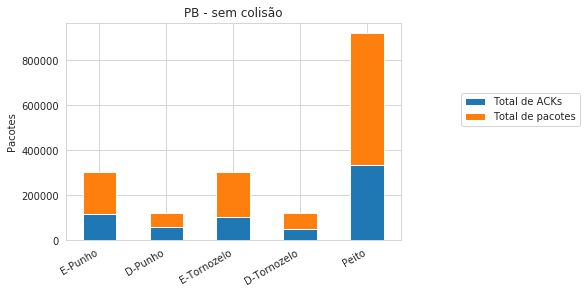

In [87]:
select = (df_data['Taxa de dados'] == 'média') & (df_data['Nó sensor'] != 'Cintura')
df = df_data[select]

df = df.groupby(by=['Simulação','Modelo de colisão'])
axes = df.plot.bar(x='Nó sensor',stacked=True,title='Título para o stacked barchart')

for t, ax in zip(df.groups.keys(),axes) :
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Pacotes',xlabel=None)
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')

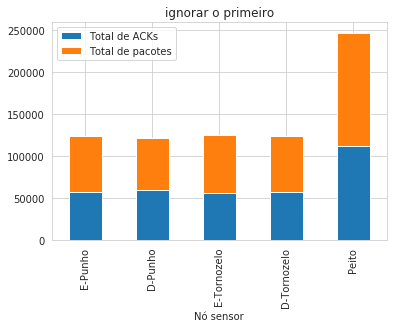

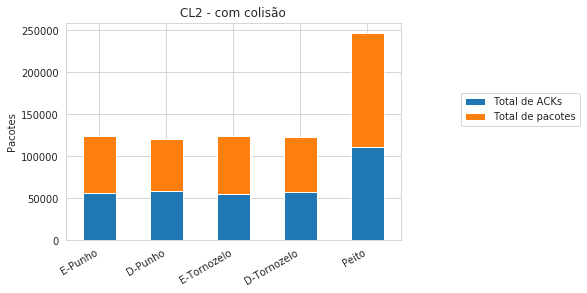

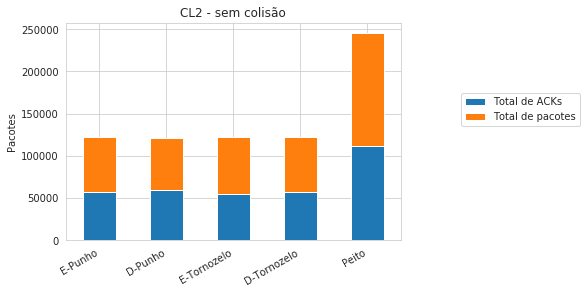

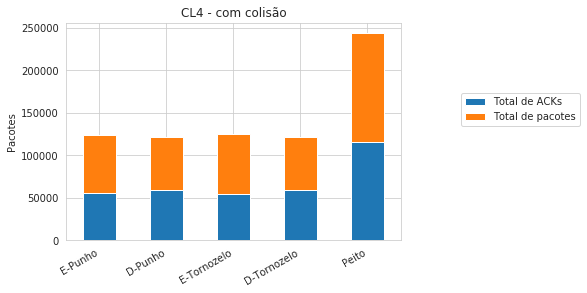

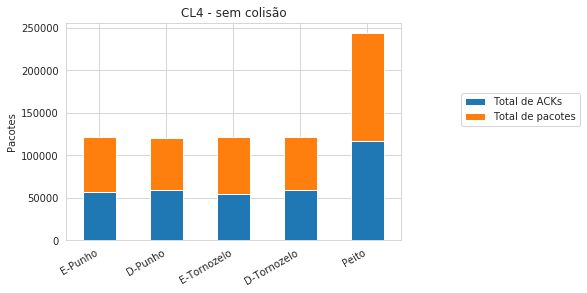

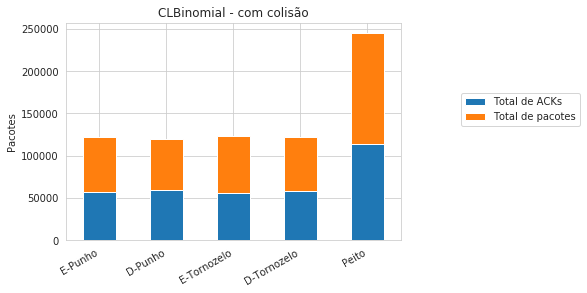

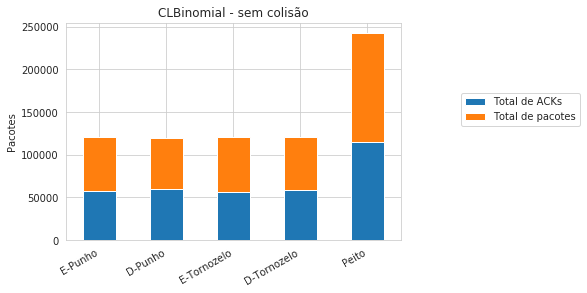

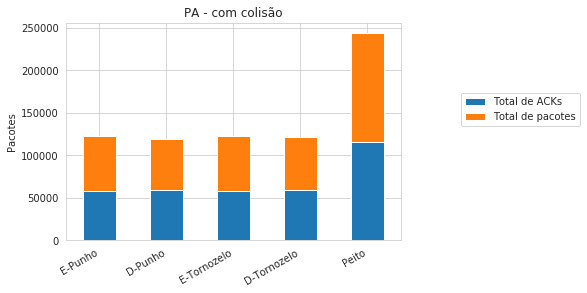

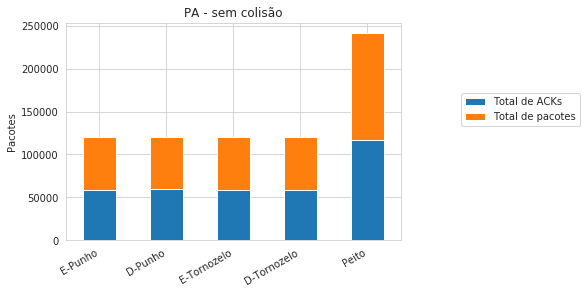

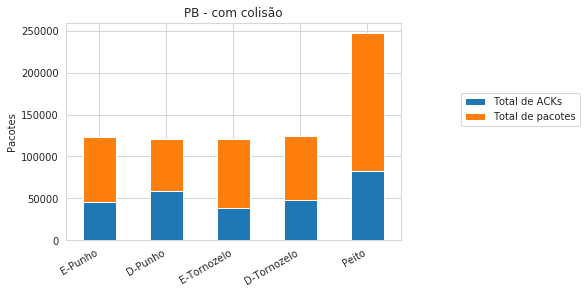

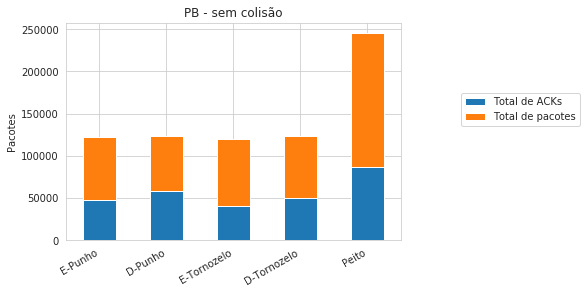

In [90]:
select = (df_data['Taxa de dados'] == 'baixa') & (df_data['Nó sensor'] != 'Cintura')
df = df_data[select]

df = df.groupby(by=['Simulação','Modelo de colisão'])
axes = df.plot.bar(x='Nó sensor',stacked=True,title='ignorar o primeiro')

for t, ax in zip(df.groups.keys(),axes) :
    simulacao, modelo_colisao = t
    ax.set(title=f'{simulacao} - {modelo_colisao}',ylabel='Pacotes',xlabel=None)
    ax.legend(loc='upper right', bbox_to_anchor=(1.55,0.7))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30, horizontalalignment='right')